In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
winemag = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
winemag.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
winemag.drop(['country','designation','province','region_1','region_2','taster_name','taster_twitter_handle',
              'title','variety','winery'],axis=1,inplace=True)
winemag.head()

,description,points,price
0,"Aromas include tropical fruit, broom, brimston...",87,NaN
1,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,"Much like the regular bottling from 2012, this...",87,65.0


In [6]:
winemag.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
winemag["description_length"] = [len(desc) for desc in winemag['description']]
winemag.head()

,description,points,price,description_length
0,"Aromas include tropical fruit, broom, brimston...",87,NaN,172
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,227
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,199
4,"Much like the regular bottling from 2012, this...",87,65.0,249


In [8]:
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()

In [9]:
#winemag['country_codes'] = lb_make.fit_transform(winemag['country'])
#winemag.head()

In [10]:
#winemag.drop(['country'], inplace=True)
#winemag.head()

In [11]:
# Try stemming to get features
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer('english')
#def stem(words):
#    return ' '.join([stemmer.stem(word) for word in words.split(' ')])

In [8]:
#winemag['description_stem'] = winemag['description'].apply(stem)

In [9]:
winemag.dropna(inplace=True)
winemag.describe()
winemag.head()

,description,points,price,description_length
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,227
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,199
4,"Much like the regular bottling from 2012, this...",87,65.0,249
5,Blackberry and raspberry aromas show a typical...,87,15.0,261


In [15]:
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import text

In [16]:
corpus = winemag['description'].values
Y = winemag['points']
winemag.head()

,description,points,price,description_length
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,227
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,199
4,"Much like the regular bottling from 2012, this...",87,65.0,249
5,Blackberry and raspberry aromas show a typical...,87,15.0,261


In [17]:
customStopWords = text.ENGLISH_STOP_WORDS.union(['wine', '2009', '2010','2011', '2012', '2013', '2014', '2015','2016', '2017', '2018',
                                                 '2019', '2020', '2021', '2022','2023', '2024', '2025', '2030', '100', '10', '12',
                                                 '14', '15', '20', '25', '30','40', '50', '60', '70', '90'])
features_count = 1000
CV = CountVectorizer(stop_words=customStopWords, max_features=features_count, ngram_range=(1,2))
X = CV.fit_transform(corpus)


In [18]:
X_array = X.toarray()

inverted_dict = dict([[v,k] for k,v in CV.vocabulary_.items()])
final_dict = {} 

for x in range(len(X_array[0,:])):
    final_dict[inverted_dict[x]]=np.sum(X_array[:,x]) 

In [19]:
TFIDF = TfidfTransformer()
X_TFIDF = TFIDF.fit_transform(X)

In [21]:
Y = Y.astype(int)

X = np.append(X_TFIDF.toarray(), winemag['description_length'].values[:, None], axis=1)
X = np.append(X, winemag['price'].values[:, None], axis=1)

In [22]:
Y.shape

(120975,)

In [23]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
0,0.0,0.0,0.0,0.0,0.0,0.0,0.136780,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,15.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.116594,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,14.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.0,13.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,65.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.136219,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.0,15.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(X_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_df_scaled = scaler.transform(X_df)

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=10)

In [30]:
pca.fit(X_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
X_df_pca = pca.transform(X_df_scaled)

In [32]:
X_df_pca.shape

(120975, 10)

In [33]:
X_df_scaled.shape

(120975, 1002)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
predictions = lm.predict(X_test)

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(metrics.explained_variance_score(y_test, predictions))

MAE: 1.377163998207412
MSE: 3.087477008408402
RMSE: 1.7571217966915105
0.6675514991293453


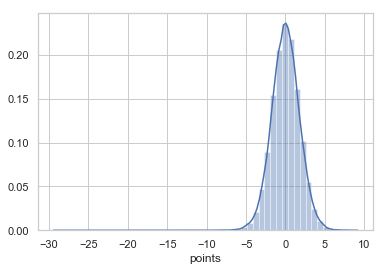

In [40]:
sns.distplot((y_test-predictions),bins=50);

Text(0, 0.5, 'Predicted Y')

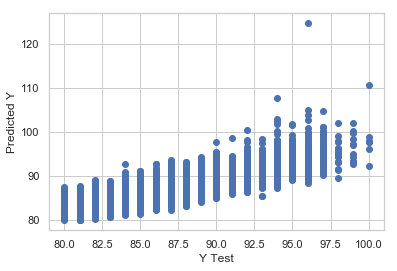

In [41]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [42]:
import xgboost as xgb

In [43]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100, 
                             learning_rate=0.2, 
                             gamma=0, 
                             subsample=0.75,
                             colsample_bytree=1,
                             max_depth=7)

In [44]:
xgb_model.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.2, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.75, verbosity=1)

In [45]:
predictions = xgb_model.predict(X_test)
print(metrics.explained_variance_score(y_test,predictions))

0.7000118787762125
